In [ ]:
K = 100
r = 0.02
sigma = 0.2
T = 0.5
S0 = 102

In [4]:
import numpy as np
from numpy.random import standard_normal

In [1]:
import numpy as np

def antithetic_call_put_mc(nSim, tau, r, sigma, S0, K):
    np.random.seed(1)
    Z = np.random.normal(loc=0, scale=1, size=nSim)
    
    WT = np.sqrt(tau) * Z
    # ST1 and ST2 and the antithetic variates
    ST1 = S0*np.exp((r - 0.5*sigma**2)*tau + sigma*WT)
    ST2 = S0*np.exp((r - 0.5*sigma**2)*tau + sigma*(-WT))
    
    # call option price and standard error
    simulated_call_payoffs1 = np.exp(-r*tau)*np.maximum(ST1-K, 0)
    simulated_call_payoffs2 = np.exp(-r*tau)*np.maximum(ST2-K, 0)
    # get the average
    simulated_call_payoffs = (simulated_call_payoffs1 + simulated_call_payoffs2)/2
    price_call = np.mean(simulated_call_payoffs)
    sterr_call = np.std(simulated_call_payoffs)/np.sqrt(nSim)
    
    # put option price and standard error
    simulated_put_payoffs1 = np.exp(-r*tau)*np.maximum(K-ST1, 0)
    simulated_put_payoffs2 = np.exp(-r*tau)*np.maximum(K-ST2, 0)
    # get the average
    simulated_put_payoffs = (simulated_put_payoffs1 + simulated_put_payoffs2)/2
    price_put = np.mean(simulated_put_payoffs)
    sterr_put = np.std(simulated_put_payoffs)/np.sqrt(nSim)
    
    output = {'price_call': price_call, 'sterr_call': sterr_call, 
              'price_put': price_put, 'sterr_put': sterr_put}
    return output

results = antithetic_call_put_mc(nSim=2000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105)
print(results)


E:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
E:\anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


{'price_call': 0.8135354969261848, 'sterr_call': 0.030629967545415894, 'price_put': 5.113729322853826, 'sterr_put': 0.025360408030024775}


In [8]:
def antithetic_call_put_mc(nSim, tau, r, sigma, S0, K, B=None):
    Z = np.random.normal(size=nSim)
    WT = np.sqrt(tau) * Z
    ST1 = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*WT)
    ST2 = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*(-WT))
    simulated_call_payoffs1 = np.exp(-r*tau) * np.maximum(ST1 - K, 0)
    simulated_call_payoffs2 = np.exp(-r*tau) * np.maximum(ST2 - K, 0)
    simulated_call_payoffs = (simulated_call_payoffs1 + simulated_call_payoffs2) / 2
    price_call = np.mean(simulated_call_payoffs)
    sterr_call = np.std(simulated_call_payoffs) / np.sqrt(nSim)
    simulated_put_payoffs1 = np.exp(-r*tau) * np.maximum(K - ST1, 0)
    simulated_put_payoffs2 = np.exp(-r*tau) * np.maximum(K - ST2, 0)
    simulated_put_payoffs = (simulated_put_payoffs1 + simulated_put_payoffs2) / 2
    price_put = np.mean(simulated_put_payoffs)
    sterr_put = np.std(simulated_put_payoffs) / np.sqrt(nSim)
    if B is not None:
        ST1_B = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*WT) / B
        ST2_B = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*(-WT)) / B
        knocked_out1 = (ST1_B > 1).astype(float)
        knocked_out2 = (ST2_B > 1).astype(float)
        knocked_out = (knocked_out1 + knocked_out2) > 0
        price_call = price_call * (1 - np.mean(knocked_out))
        sterr_call = sterr_call * np.sqrt(1 - np.mean(knocked_out))
        price_put = price_put * (1 - np.mean(knocked_out))
        sterr_put = sterr_put * np.sqrt(1 - np.mean(knocked_out))
    output = {'price_call': price_call, 'sterr_call': sterr_call, 'price_put': price_put, 'sterr_put': sterr_put}
    return output

In [32]:
results = antithetic_call_put_mc(nSim=2000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)
print(results)

{'price_call': 0.7884958046555129, 'sterr_call': 0.02971660355463853, 'price_put': 5.0938775106423035, 'sterr_put': 0.024638966432467324}


In [33]:
t =results['price_call'] - results['sterr_call']
print(round(t,3))
t =results['price_put'] - results['sterr_put']
print(round(t,3))

0.759
5.069


In [35]:
print(0.759 - 0.8)
print(5.069 - 5.103)

-0.041000000000000036
-0.03399999999999981


In [10]:
results = antithetic_call_put_mc(nSim=20000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)
print(results)

{'price_call': 0.7994178484830825, 'sterr_call': 0.009532100302810218, 'price_put': 5.102108936384329, 'sterr_put': 0.007896690338783065}


In [11]:
results = antithetic_call_put_mc(nSim=200000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)
print(results)

{'price_call': 0.7971189803539274, 'sterr_call': 0.0030133302836818586, 'price_put': 5.099966296327135, 'sterr_put': 0.0024962467219901566}


In [12]:
results = antithetic_call_put_mc(nSim=2000000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)
print(results)

{'price_call': 0.8006378743760313, 'sterr_call': 0.0009541393435712639, 'price_put': 5.10303474409626, 'sterr_put': 0.0007906430895817916}


In [13]:
results = antithetic_call_put_mc(nSim=20000000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)
print(results)

{'price_call': 0.8006312190215878, 'sterr_call': 0.00030194962360062424, 'price_put': 5.102994121520889, 'sterr_put': 0.0002501681038892237}


In [27]:
t =results['price_call'] - results['sterr_call']
print(round(t,3))

0.8


In [30]:
t =results['price_put'] - results['sterr_put']
print(round(t,3))

5.103


In [43]:
def antithetic_call_put_mc(nSim, tau, r, sigma, S0, K, B=None):
    prices_call = []
    sterrs_call = []
    prices_put = []
    sterrs_put = []
    iteration = []
    for i in range(nSim):
        Z = np.random.normal()
        WT = np.sqrt(tau) * Z
        ST1 = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*WT)
        ST2 = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*(-WT))
        simulated_call_payoffs1 = np.exp(-r*tau) * np.maximum(ST1 - K, 0)
        simulated_call_payoffs2 = np.exp(-r*tau) * np.maximum(ST2 - K, 0)
        simulated_call_payoffs = (simulated_call_payoffs1 + simulated_call_payoffs2) / 2
        price_call = np.mean(simulated_call_payoffs)
        sterr_call = np.std(simulated_call_payoffs) / np.sqrt(nSim)
        simulated_put_payoffs1 = np.exp(-r*tau) * np.maximum(K - ST1, 0)
        simulated_put_payoffs2 = np.exp(-r*tau) * np.maximum(K - ST2, 0)
        simulated_put_payoffs = (simulated_put_payoffs1 + simulated_put_payoffs2) / 2
        price_put = np.mean(simulated_put_payoffs)
        sterr_put = np.std(simulated_put_payoffs) / np.sqrt(nSim)
        if B is not None:
            ST1_B = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*WT) / B
            ST2_B = S0 * np.exp((r - 0.5*sigma**2)*tau + sigma*(-WT)) / B
            knocked_out1 = (ST1_B > 1).astype(float)
            knocked_out2 = (ST2_B > 1).astype(float)
            knocked_out = (knocked_out1 + knocked_out2) > 0
            price_call = price_call * (1 - np.mean(knocked_out))
            sterr_call = sterr_call * np.sqrt(1 - np.mean(knocked_out))
            price_put = price_put * (1 - np.mean(knocked_out))
            sterr_put = sterr_put * np.sqrt(1 - np.mean(knocked_out))
        output = {'price_call': price_call, 'sterr_call': sterr_call, 'price_put': price_put, 'sterr_put': sterr_put}
        prices_call.append(price_call)
        sterrs_call.append(sterr_call)
        prices_put.append(price_put)
        sterrs_put.append(sterr_put)
        iteration.append(i)
    return prices_call, sterrs_call, prices_put, sterrs_put, iteration

In [44]:
prices_call, sterrs_call, prices_put, sterrs_put, iteration = antithetic_call_put_mc(nSim=2000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)

In [47]:
import matplotlib.pyplot as plt

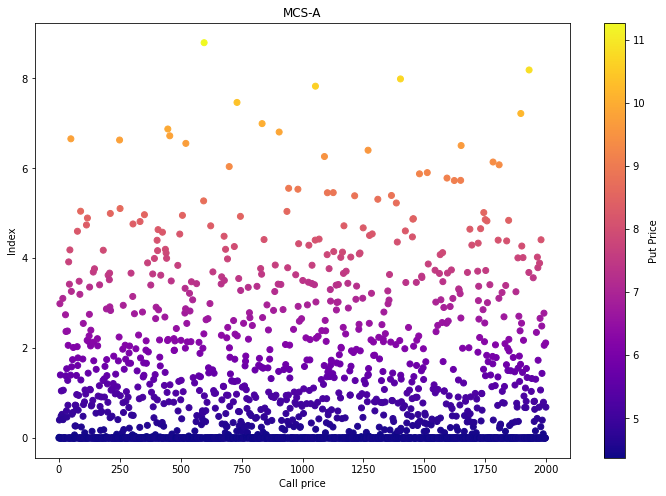

In [48]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(iteration,prices_call,c=prices_put,cmap='plasma')
plt.colorbar(label='Put Price')
plt.xlabel('Call price')
plt.ylabel('Index')
plt.title('MCS-A');

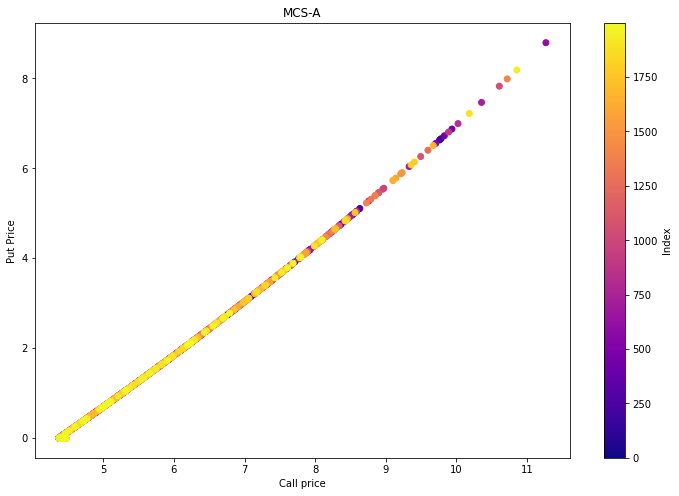

In [49]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(prices_put,prices_call,c=iteration,cmap='plasma')
plt.colorbar(label='Index')
plt.xlabel('Call price')
plt.ylabel('Put Price')
plt.title('MCS-A');

In [50]:
prices_call, sterrs_call, prices_put, sterrs_put, iteration = antithetic_call_put_mc(nSim=2_000_000, tau=1/12, r=0.08, sigma=0.2, S0=100, K=105, B = 140)

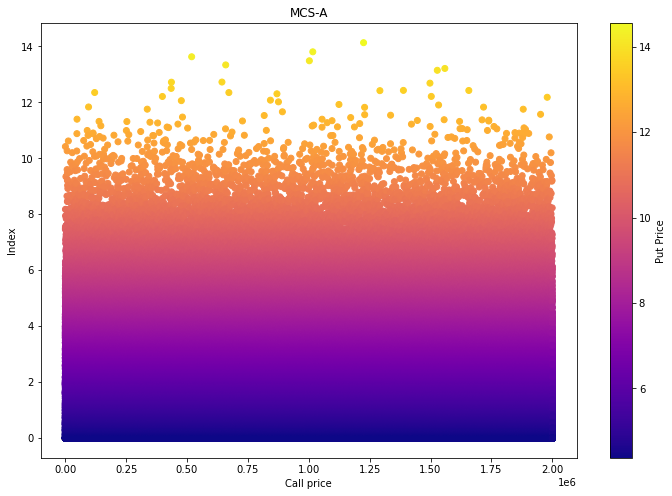

In [51]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(iteration,prices_call,c=prices_put,cmap='plasma')
plt.colorbar(label='Put Price')
plt.xlabel('Call price')
plt.ylabel('Index')
plt.title('MCS-A');

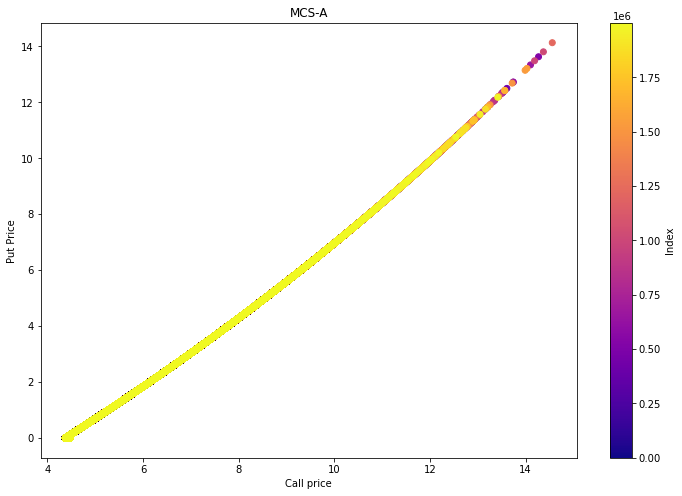

In [52]:
# plot the data
plt.figure(figsize=(12,8))
plt.scatter(prices_put,prices_call,c=iteration,cmap='plasma')
plt.colorbar(label='Index')
plt.xlabel('Call price')
plt.ylabel('Put Price')
plt.title('MCS-A');

# №2

In [54]:
def binomial_option_price(S, K, r, q, sigma, T, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp((r - q) * dt) - d) / (u - d)
    S_arr = S * u ** np.arange(N, -1, -1) * d ** np.arange(0, N+1)
    if option_type == 'call':
        option_payoffs = np.maximum(S_arr - K, 0)
    else:
        option_payoffs = np.maximum(K - S_arr, 0)
    option_values = np.zeros(N+1)
    for i in range(N+1):
        option_values[i] = np.sum(option_payoffs * np.array([p ** j * (1 - p) ** (N - j) for j in range(i, N+1)]))
        option_values[i] = option_values[i] * np.exp(-r * T * (N - i) / N)
    price = option_values[0]
    sterr = np.std(option_values) / np.sqrt(N)
    return price, sterr

Чтобы вычислить $q$ для модели биномиального дерева с месячными шагами, нам нужно сначала вычислить месячную риск-нейтральную вероятность движения вверх, обозначаемую $p_u$. Мы можем рассчитать $p_u$ по следующей формуле:

$$p_u = \frac{e^{r \Delta t} - d}{u - d}$$.

где $\Delta t$ - длина временного шага (в годах), $r$ - безрисковая процентная ставка, а $u$ и $d$ - повышающий и понижающий мультипликаторы для цены акций на каждом временном шаге. Понижающий мультипликатор - это просто обратная величина повышающего мультипликатора, поэтому мы можем рассчитать $d$ следующим образом:

$$d = \frac{1}{u}$$.

Чтобы рассчитать $u$ и $d$, нам нужно сначала рассчитать месячную волатильность логарифмической доходности, обозначаемую $\sigma_m$. Мы можем вычислить $\sigma_m$ из годовой волатильности логарифмической доходности, обозначаемой $\sigma$, следующим образом:

$$\sigma_m = \frac{\sigma}{\sqrt{12}}$$.

Получив $\sigma_m$, мы можем рассчитать $u$ и $d$ по следующим формулам:

$$u = e^{\sigma_m \sqrt{\Delta t}}$$.

$$d = e^{-\sigma_m \sqrt{\Delta t}}$$.

В данном случае, мы имеем $\sigma = 0.2$, $\Delta t = 1/12$, $r = 0.08$, $S_0 = 100$, $K = 105$, и $B = 140$. Таким образом, мы можем вычислить $\sigma_m$ как:

$$\sigma_m = \frac{0.2}{\sqrt{12}} \approx 0.0577$$.

Затем, мы можем рассчитать $u$ и $d$ как:

$$u = e^{0.0577 \sqrt{1/12}} \approx 1.0143$$.

$$d = e^{-0.0577 \sqrt{1/12}} \approx 0.9859$$.

Наконец, мы можем рассчитать $p_u$ по формуле:

$$p_u = \frac{e^{0.08(1/12)} - 0.9859}{1.0143 - 0.9859} \approx 0.5133$$.

Следовательно, имеем $q = 1 - p_u \approx 0.4867$.


In [63]:
price, sterr = binomial_option_price(S=100, K=105, r=0.08, q=0.4867, sigma=0.2, T=12, N=1, option_type='call')

In [64]:
print(price, sterr)

48.292837504560985 39.74221586543836


In [68]:
price, sterr = binomial_option_price(S=100, K=105, r=0.08, q=0.4867, sigma=0.2, T=12, N=1, option_type='put')

In [69]:
price, sterr

(-6.917095429105693, 5.5741291547104055)

# 3 Выводы

Биноминальная модель дает гораздо более неуверенный результат, в сравнении с методом-монтекарло и цена значительно выше для колл опциона и чуть менее значительно значима для пут опциона, в котором отличие меньше 200%, а в колл отличия в 50 раз

In [ ]:
Такие значительные отличия вызваны тем, что волотильность на каждом периоде значительна, будь месячная или годовая волотильность = 0,2


$$ q = e^{(r-q_m)\Delta t} \frac{1}{2} \left[ 1 + \frac{(r - q_m - \frac{1}{2}\sigma_m^2)\sqrt{\Delta t}}{\sigma_m}\right] $$

Используя те же значения, что и раньше, но теперь с $\sigma_m = 0.2$ и $\Delta t = \frac{1}{12}$, мы имеем:

$$ q = e^{(0.08 - 0.2^2/2)\frac{1}{12}} \frac{1}{2} \left[ 1 + \frac{(0.08 - 0.2^2/2 - 0)\sqrt{\frac{1}{12}}}{0.2}\right] \approx 0.515 $$

Таким образом, для этого случая мы можем использовать $q=0,515$ в биномиальной модели.

In [70]:
price, sterr = binomial_option_price(S=100, K=105, r=0.08, q=0.515, sigma=0.2, T=12, N=1, option_type='call')

In [71]:
price, sterr

(48.34585582806004, 39.837958911442534)

In [72]:
price, sterr = binomial_option_price(S=100, K=105, r=0.08, q=0.4867, sigma=0.2, T=12, N=1, option_type='put')

In [73]:
price, sterr

(-6.917095429105693, 5.5741291547104055)

Причины могут быть такими: 

Метод ценообразования: Биномиальная модель использует закрытую формулу для расчета цены опциона, в то время как модель Монте-Карло полагается на моделирование для оценки цены опциона. Различные методы ценообразования могут также привести к различиям в оценке цены опциона.

Шаг по времени: В биномиальной модели цена опциона рассчитывается на дискретных временных шагах. Чем меньше шаг по времени, тем более точной может быть оценка. Однако меньший шаг по времени также означает большее количество вычислений, что может быть дорогостоящим. В модели Монте-Карло цена опциона может быть оценена в любой момент времени, но меньший шаг по времени также означает необходимость большего количества симуляций, что может увеличить вычислительную нагрузку.
    

Тут видно, что для биноминальной модели, вероятно слишком мало шагов, поэтому она дает более неточный результат и более отклоненый от реальности, чем в симуляции монте карло 